In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
from IPython.display import display

In [7]:
# Physical constants
g = 9.8
L = 2
mu = .5 # was .1 but changed to see the resitance quicker

THETA_0 = np.pi/3 # 60 degrees
THETA_DOT_0 = 0 # no initial velocity

In [3]:
# ODE def
def get_theta_double_dot(theta, theta_dot):
    return -mu * theta_dot - (g/L) * np.sin(theta)

# solution to the differential equation
def theta(t):
    theta = THETA_0
    theta_dot = THETA_DOT_0
    delta_t = .01
    for time in np.arange(0, t, delta_t):
        theta_double_dot = get_theta_double_dot(
            theta, theta_dot
        )
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
    return theta

In [4]:
# Printing theta in time steps
# Solving ODE numerically
start_t = 0
end_t = 30
step_t = .1
t_vec = np.arange(start_t, end_t, step_t)
angles = []
for t in np.arange(start_t, end_t, step_t):
    angles.append(theta(t))

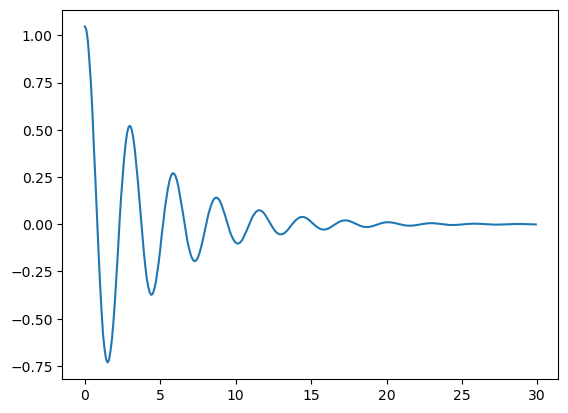

In [5]:
plt.plot(t_vec, angles)
plt.show()

In [6]:
x = L * np.sin(angles)
y = -L * np.cos(angles)
t = t_vec

x0,y0 = x[0], y[0]

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')

line, = ax.plot([0, x0], [0, y0], lw=3, c='green')
bob_radius = 0.08
circle = ax.add_patch(plt.Circle((x0,y0), bob_radius,
                      fc='r', zorder=3))

ax.set_xlim([-x.max()-0.5, x.max()+0.5])
ax.set_ylim([y.min()-0.5,0.5])

def animate(i):
    """Update the animation at frame i."""
    line.set_data([0, x[i]], [0, y[i]])
    circle.set_center((x[i], y[i]))

nsteps = len(x)
nframes = nsteps
dt = t[1]-t[0]
interval = dt * 1000
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=True,
                              interval=interval)
display(HTML(ani.to_html5_video()))
plt.clf()

<Figure size 640x480 with 0 Axes>